# How does the Proportion of Women in Parliament Affect the Country's Military Expenditure?


In [ ]:
# @title
# Install required packages
!pip install seaborn==0.10.0
!pip install numpy >= 1.13
!pip install -U linearmodels
!pip install -U stargazer
!pip install -U statsmodels
!pip install uvicorn
!pip install PtitPrince
!pip install graphviz

# Import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import pandas as pd
import numpy as np
import datetime
from collections.abc import Sequence
import plotly.express as px
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import seaborn as sns
import ptitprince as pt
from ptitprince import RainCloud
from scipy.stats import skew
import graphviz as gr



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
ERROR: Could not find a version that satisfies the requirement 1.13 (from versions: none)
ERROR: No matching distribution found for 1.13
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 M

In [ ]:
# @title
# SEABORN THEME
scale = 0.4
W = 16*scale
H = 9*scale
sns.set(rc = {'figure.figsize':(W,H)})
sns.set_style("white")

### Authors:
- [Anna Dovha](https://www.linkedin.com/in/anna-dovha-28b178218/)
- [Guillaume Chapalain](linkedin.com/in/guillaume-chapalain)
- [Maxime Sperandio](https://www.linkedin.com/in/maxime-sperandio-b30339269/)


<img src="https://cdn.britannica.com/22/181322-050-525DBCDA/honour-guard-Camp-Shaheen-Afghan-Ursula-von-2014.jpg" width="650">


*Ursula von der Leyen reviewing an Afghan honour guard at Camp Shaheen, near Mazār-e Sharīf, Afghanistan, 2014.*  
*Photo by John MacDougall—EPA/Alamy. Published on Encyclopædia Britannica.*  
[Accessed 5 December 2023](https://www.britannica.com/biography/Ursula-von-der-Leyen/images-videos#/media/1/2005334/207272)


**In short**, in this project, we aim to understand the correlation **between women's political representation and military expenditure**.

This analysis not only contributes to the discussion about higher gender representation in political environment but deepens our understanding about women's increased political participation.

Link to the full code: [GitHub repository](https://github.com/AnyaLang/DataScienceSMT)




---




# Project interest

**The participation of women in national parliaments has seen a notable rise globally**, which reflects a worldwide movement toward greater gender diversity in political representation.

In [ ]:
# @title
from IPython.display import IFrame
selected_coutries_url = "https://data.worldbank.org/share/widget?indicators=SG.GEN.PARL.ZS&locations=US-CH-ET-CL-NZ"
IFrame(selected_coutries_url, width=600, height=400)

In [ ]:
# @title
world_url = "https://data.worldbank.org/share/widget?end=2022&indicators=SG.GEN.PARL.ZS&start=1997&view=map"
IFrame(world_url, width=600, height=400)

**The shift in political representation towards more women raises the question: does it influence any policy decisions?**

Some political leaders, including the former Prime Minister of Iceland, Johanna Sigurðardóttir and the former President of the United States Barack Obama, have expressed that a higher representation of women leads to more effective policies:

> #### "After a 35-year career in Icelandic politics, I have concluded that **women are generally better than men at ensuring fairness in society**. Experience had showed me that women are often **more favorably disposed toward building a strong welfare system**, and in the wake of the financial crisis, such a system was essential to ensuring people’s basic needs, reducing unemployment and protecting low-income families"  
> — [Johanna Sigurdardottir](https://www.nytimes.com/2018/09/16/opinion/politics/johanna-sigurdardottir-give-women-a-chance.html)

> #### “I think **empowering more women** on the continent, that right away is going to, I think, **lead to some better policies**"
> — [Barack Obama](https://www.yahoo.com/lifestyle/barack-obama-urges-women-more-184600650.html?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAFeeh72GT-bIUbExOSmaPN0ue2dtMBk9E4ah9nqYsj7L5PSUzqmzEsYITrPfcl0DFTfM3oncuLcJ_-J9ZuaZayDUcT0YiiadUYwJeryqgwATEqMeo3pTBFcxy86Hqx4hMeBkGj9m4wkMXuU6AZ1v6Y_hIkLrjIIZJWdj4ZDITNhT)

While evaluating the overall improvements in countries following a rise in the number of women in parliaments globally could be too complex and quite subjective. In our analysis, we are eager to explore if an **increase in the proportion of parliamentary seats held by women has an impact on a country's military expenditure**.

Our interest was also sparked by classroom discussions on gender equality, as well as by the increasing global conflicts.



---



# Do men and women make decisions differently?

There has been much discussion among researchers and in the media about how women's priorities in decision-making differ from men's, particularly in the area as politics.

For instance, Koch and Fulton (2011) note that countries with more **female legislators tend to engage less in international armed conflicts**. Additionally, Shair-Rosenfield and Wood (2017) found that **higher numbers of female representatives in national legislatures lead to longer-lasting peace** after negotiated settlements. This effect is attributed to **women prioritizing social welfare over military spending** and enhancing public trust in governance.

Women are typically seen as **more liberal and competent in areas like education, healthcare, and environmental issues**, whereas men are viewed as more conservative and capable in military and tax matters (Alexander & Anderson, 1993; Koch, 2000; Shapiro & Mahajan, 1986).

Also a [Bloomberg article](https://www.bloomberg.com/view/articles/2017-05-18/why-europe-puts-women-in-top-defense-jobs) **in 2017 mentioned that in four of the five European countries with female defense ministers** (Germany, France, Italy, Spain, and the Netherlands), **the reduction in military force sizes has been more pronounced than in the U.S., where defence is still a male** preserve at the top.

> "As femininity is often associated with peace, for governments seeking to disassociate themselves from former military abuses of power, the appointment of a female defence minister can offer a visible break from the past and signal change and renewal."
— [Leonid Bershidsky](https://www.bloomberg.com/view/articles/2017-05-18/why-europe-puts-women-in-top-defense-jobs)




---



We believe that women might act in accordance with these stereotypes and societal expectations when they arrive to the parliament which would lead to lower military spendings. Therefore, we have formulated the following hypothesis:






> **H1:** **Countries with a higher proportion of parliamentary seats held by women have a statistically significantly lower level of military expenditure per capita.** This could be phrased as the coefficient for the proportion of women in parliament being different from zero \(*$\beta_1 \neq 0$*).

<img src="https://drive.google.com/uc?export=view&id=1I_jBGuMitjLeJddEYtdhUh33h7lrfg2H" alt="Simple regression" width="800">


To test our hypothesis, we will employ [Ordinary Least Squares (OLS)](https://www.investopedia.com/terms/l/least-squares-method.asp#:~:text=The%20least%20squares%20method%20is%20a%20statistical%20procedure%20to%20find,the%20behavior%20of%20dependent%20variables.). **OLS stands for "Ordinary Least Squares," which is a common method used in statistics to find the best-fitting line through a set of data points.**

The "least squares" part refers to the fact that this method creates a straight line that **minimizes** **deviations of the data points from the mean** - also refered as the sum of squares of the errors ((Investopedia, 2023).



<img src="https://drive.google.com/uc?export=view&id=1N3T5ALXEREI6RhBbqbombngexJIKs-3G" alt="OLS simple explanatio" width="800">

Empirically, we can express it as:

*$Y = \beta_0 + \beta_1 \times WomenParl + \epsilon$*


 Where:
  - *$Y$* is the explanatory (dependent) variable, Military expenditure per capita
  - *$WomenParl$* is the primary explanatory (independent) variable, the proportion of seats held by women in the national parliament
  - *$\epsilon$* is the error term


β_0 is the constant term (intercept), and β_1 is the coefficients to be estimated for the corresponding independent variables (slope in the visual above).

**However, is it all that simple? Not really...**



---



# Data




Let's first take a moment to examine the data we use and then proceed to the analysis part.


Our analysis predominantly relies on data sourced from the World Bank, accessed through the [**wbdata**](https://wbdata.readthedocs.io/en/stable/) Python package. Additionally, we used dataset from the [Polity5 project](https://www.systemicpeace.org/polityproject.html) using a [direct URL](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/2023/02_Data-Cleaning/data/polity2_iso3.csv).

In [ ]:
# @title
url_total = "https://raw.githubusercontent.com/AnyaLang/DataScienceSMT/main/df_total.csv"
df_total = pd.read_csv(url_total)

In [ ]:
# @title
url_average = "https://raw.githubusercontent.com/AnyaLang/DataScienceSMT/main/df_total_average.csv"
df_total_average = pd.read_csv(url_average)

### Snapshot of Countries



---



The countries included in our analysis are split into four income groups, following the World Bank categories:

- Low Income (LIC)
- Lower Middle Income (LMC)
- Upper Middle Income (UMC)
- High Income (HIC)

Our **analysis covers the years 1997 to 2018**, given the data availability for the data on women's participation in national parliaments, which had many missing values before 1997, and the polity dataset, which only goes up to 2018.

We excluded some countries such as North Korea, Somalia, Bosnia and Herzegovina, and the Solomon Islands, among others, due to limited data availability. We attribute this to factors such as the small size of these countries, political and economic isolation, resource limitations, etc.

In [ ]:
# @title

fig_total_clean = px.choropleth(df_total.reset_index(),
                                locations="country",
                                locationmode='country names',
                                color="Source",
                                hover_name="country",
                                hover_data=["Source"],
                                color_continuous_scale=px.colors.qualitative.Bold,
                                title="World Map Categorized by Country Income Groups Included in the Analysis",
                                labels={"Source": "Income Group"})

fig_total_clean



---



### Military Spending and Women's Representation in Parliaments Worldwide

Now that we are familiar with the countries included in our analysis, let's take a closer look at the distribution of our response variable, `mil_exp_cap` (military expenditure per capita), and the main explanatory variable, `women_parl` (percentage of women in parliament)

It's important to note the **uneven distribution of military spending per capita among different countries in our dataset**.

Skewness of the military expenditure per capita for all the countries: 
2.804244354287876


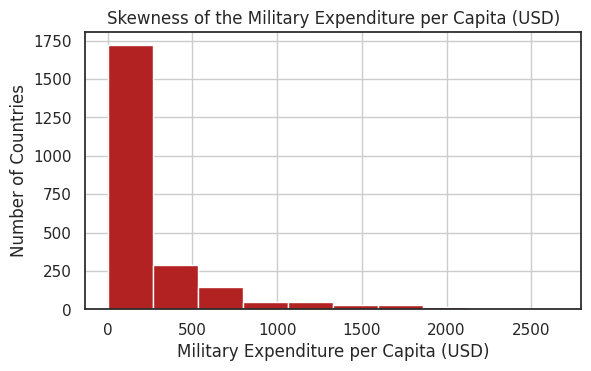

In [ ]:
# @title
df_total.hist(column='mil_exp_cap', color='firebrick')
print("Skewness of the military expenditure per capita for all the countries: ")
plt.xlabel('Military Expenditure per Capita (USD)')
plt.ylabel('Number of Countries')
plt.title('Skewness of the Military Expenditure per Capita (USD)')

print(skew(df_total['mil_exp_cap'], nan_policy='omit'))

To address this and enhance the visualization of `mil_exp_cap`, we have applied a **log transformation to the data**. We are using a raincloud graph to show this data.

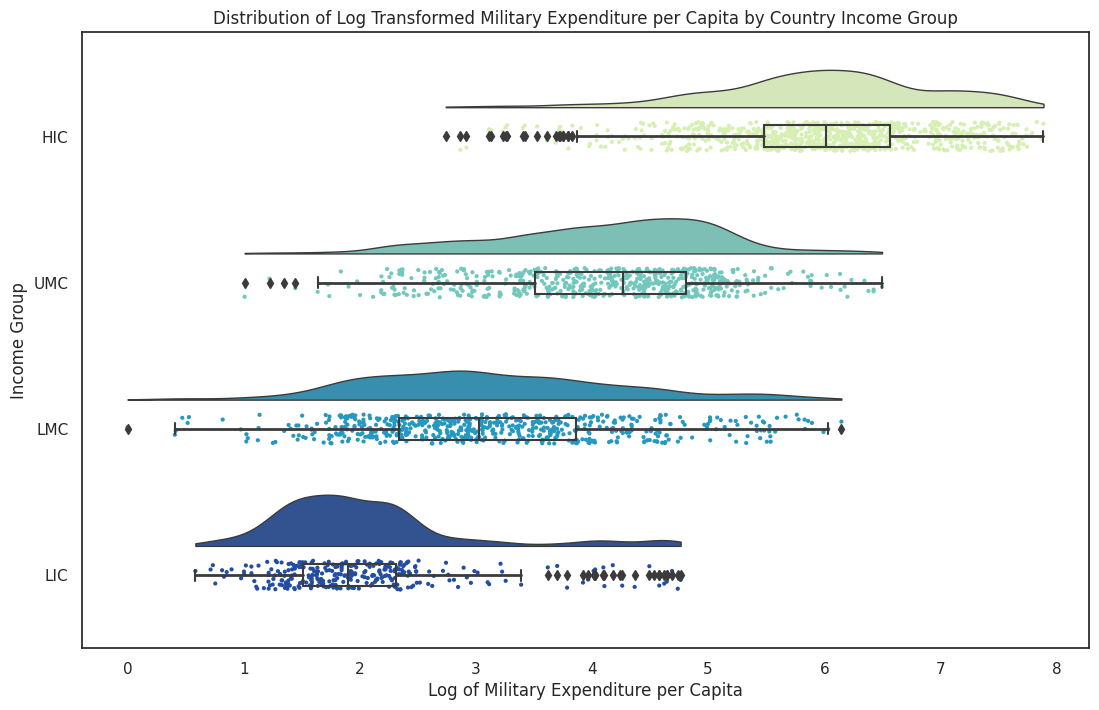

In [ ]:
# @title
plt.figure(figsize=(13, 8))
RainCloud(data=df_total, x='Source', y='log_mil_exp_cap', orient='h', palette='YlGnBu', bw=.2)
plt.title('Distribution of Log Transformed Military Expenditure per Capita by Country Income Group')
plt.ylabel('Income Group')
plt.xlabel('Log of Military Expenditure per Capita')
plt.show()

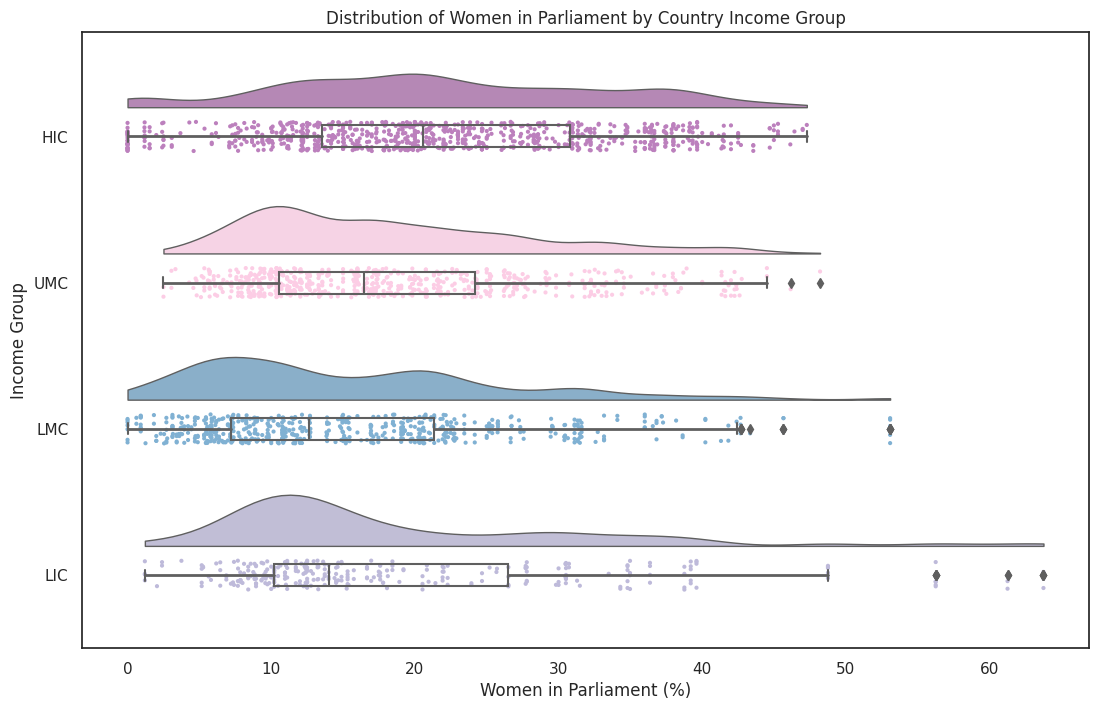

In [ ]:
# @title
plt.figure(figsize=(13, 8))
RainCloud(data=df_total, y='women_parl', x='Source', orient='h',palette="Set3_r", bw=.2)
plt.title('Distribution of Women in Parliament by Country Income Group')
plt.ylabel('Income Group')
plt.xlabel('Women in Parliament (%)')
plt.show()

# Analysis explanation

In our further steps of the analysis, we will describe step by step how we test our hypothesis.

## Everything is not as simple as it might look

Looking at the scatter plot below for the high-income countries (HIC), we observe the downward trend which might imply that the increase in women in parliament is associated with the decrease in military spending.

In [ ]:
# @title
df_filtered_hic = df_total_average[df_total_average['Source'] == 'HIC'].reset_index(drop=True)

fig_total = px.scatter(
    df_filtered_hic,
    x='women_parl',
    y='mil_exp_cap',
    color='Source',
    trendline="ols",
    color_discrete_sequence=['red'],
    labels={
        'women_parl': 'Women in Parliament (%)',
        'mil_exp_cap': 'Military Expenditure per Capita (USD)'
    },
    title='Average Military Expenditure per Capita vs. Women\'s Share in Parliament (1997-2018)',
    hover_name='country'
)

fig_total.show()

However, we cannot make any conclusion at this stage of our analysis without considering other factors. For example, the government type, a geographical location, or conflict involvement, which could have significant influence over countries military spending.

Take the outliers as an example. Countries, which are involved in ongoing conflicts, like Israel, might have a higher need for military expenses regardless of women's representation in parliament. Also, countries such as Oman, Qatar and Kuwait may have fewer women in parliament due to cultural norms.


> **These overlooked details end up in a catch-all called the 'error term,' which can skew our results**.

<img src="https://drive.google.com/uc?export=view&id=1oHJYz9QR_X2nP3HRRT2n-TetS5wk8pRe" alt="Meme" width="800">


## Combating bias in the model (not with weapons but confounders)

**Confounders are the variables which could influence both the representation of women in parliament and military expenditure**, potentially biasing the estimated effect of *$WomenParl$* on *$Y$* (military expenditure). **We decided to include two confounding variables:**

- **Democracy**: democracies may spend less on the military due to peaceful tendencies, especially towards other democracies (Journal of Peace Research, 1997). Besides, such countries may allow more women in politics due to transparent governance.

- **GDP per Capita**: accounts for the economic capacity and wealth of a country. Wealthier nations with higher GDPs per capita may have greater capacity to invest into military but also and in social programs that support gender equality in politics.





<img src="https://drive.google.com/uc?export=view&id=1mcCN2G1dJliDn3DIBO0zz6J63LPeQa5B" alt="Confounders" width="800">



---




Including these variables help us to reduce the potential for  **omitted variable bias**. For instance, if we do not control for wealth of the country, **we might be overestimating the real effect of women in parliament on military expenditure** (**upward bias**). Our model might fail to account for the fact that richer states may have more resources for the military spendings, and possibly higher representation of women in their parliaments.

We observe that GDP per capita (`gdp_capita`) is positively correlated with both the `mil_exp_cap` and `women_parl`. Additionally, `democracy` shows a positive correlation with the `women_parl`, suggesting that higher level of democracy are associated with higher women percentage in parliament and negative with `mil_exp_cap`, although it is very weak.




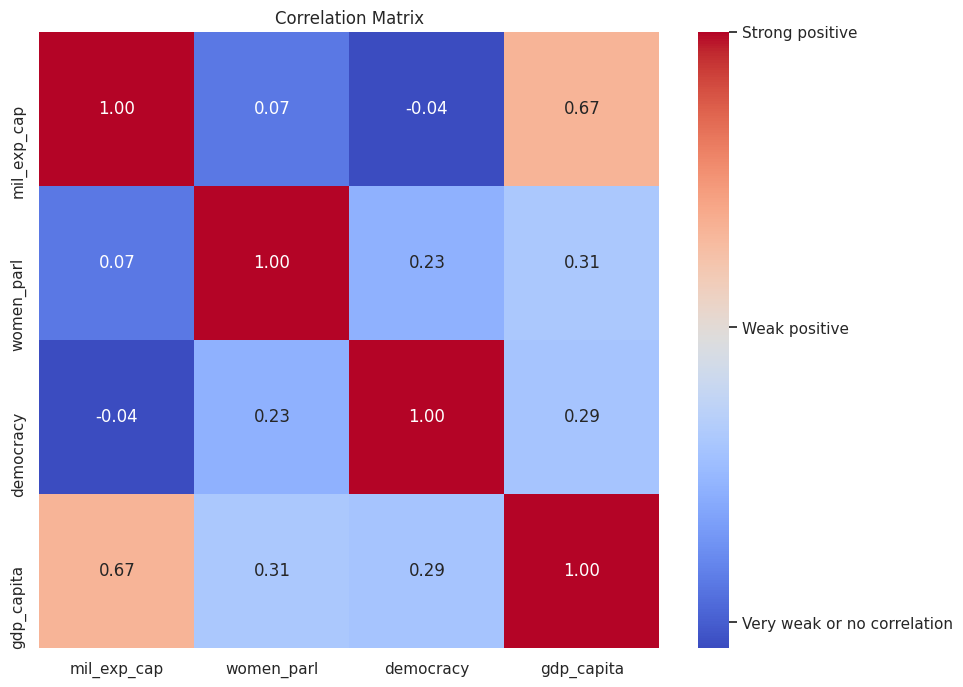

In [ ]:
# @title
selected_columns = df_total[['mil_exp_cap', 'women_parl', 'democracy', 'gdp_capita']]
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))

# Create a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([ 0, 0.5, 1])
colorbar.set_ticklabels(['Very weak or no correlation', 'Weak positive', 'Strong positive'])

# Show the plot
plt.show()

## "Diversity" of the model

We acknowledge the rich diversity of nations, each with its distinct culture, history, and other factors. While it is great in the real world, this **diversity, or 'heterogeneity', can affect the results our model**.


<img src="https://drive.google.com/uc?export=view&id=1cHIhzKhr5H87wu5o3jORykuH7TtkM23T" alt="Heterogeneity" width="800">

To focus on the true effect of women's representation on military spending, **we use fixed effects in our analysis**. And just as the name suggests, in this technique something is held fixed, particularly some characteristics which are constant over time. In the case of our data, these could be the geographic location, cultural differences, etc.



Following the previous discussion, our **empirical model is specified as**:

*$Y_{it} = \beta_0 + \beta_1 \times WomenParl_{it} + \beta_2 \times Democracy_{it} + \beta_3 \times GDPCapita_{it} + \mu_i + \epsilon_{it}$*


 Where:
  - *$Y_{it}$* is the Military expenditure as a GDP per capita for country *i* at time *t*.
  - *$WomenParl_{it}$* is the percentage of seats held by women in the national parliament for country *i* at time *t*.
  - *$Democracy_{it}$* is the political regime score for country *i* at time *t*, ranging from -10 (full autocracy) to +10 (full democracy).
  - *$GDPCapita_{it}$* is the GDP per capita for country *i* at time *t*.
  - *$\mu_i$* represents the fixed effects capturing unobserved country-specific attributes that are constant over time.
  - *$\epsilon_{it}$* is the error term for country *i* at time *t*.


β_0 is the constant term, and β_1 ... β_3 are the coefficients to be estimated for the corresponding independent variables.


## Can anything else lead to stronger participation of women in the countries?

In addition to our main model, we applied the model with an interaction term between `women_parl` and `stability` *(measures political stability and the absence of violence, ranges from  -2.5 to 2.5).* By doing so, we want to see if the effect of `women_parl` on the `mil_exp_cap` changes depending on whether a country is more or less politically stable.

In [ ]:
# @title
median_stability = df_total_average['stability'].median()

filtered_df_above_median = df_total_average[df_total_average['stability'] > median_stability]
filtered_df_below_median = df_total_average[df_total_average['stability'] <= median_stability]

filtered_df = pd.concat([filtered_df_above_median, filtered_df_below_median])

filtered_df['stability_category'] = filtered_df['stability'].apply(lambda x: 'Above Median' if x > median_stability else 'Below or Equal Median')

#filter for 'mil_expenditure' because of the outlier Eritrea with 26% of mil_exp and Rwanda with 51% of women_parl
filtered_df = filtered_df[filtered_df['mil_expenditure'] < 10]
#filtered_df = filtered_df[filtered_df['women_parl'] < 45]

In [ ]:
# @title
# Create the scatter plot
fig_total = px.scatter(filtered_df, x='women_parl', y= 'mil_expenditure', trendline="ols",
                       color='stability_category',
                       color_discrete_map={'Above 0': 'blue', 'Below or Equal 0': 'red'},
                       labels={'women_parl': 'Women in Parliament (%)', 'mil_expenditure': 'Military Expenditure (% of the total GDP)'},
                       title='Scatter Plot of Average Values of Military Expenditure (% of the total GDP) vs. Women\'s Share in Parliament (1997-2018)',
                       hover_name='country')

# Show the figure
fig_total.show()

## Reverse Causality

However, even the model with fixed effects can fail to address the issue of **reverse causality**.




<img src="https://drive.google.com/uc?export=view&id=1ZdhY1fbIed-dfpSChd4W3HQUguHraHnE" alt="Reverse causality" width="800">




By introducing Instrumental Variable (IV) to better isolate the impact of women representation on the military expenditure, we try to address the reverse causality concern.




---



## One step further by using Instrumental Variable

> The idea of IV is to find another variable that is **correlated with the treatment** (has a first stage) and only **affects the outcome through the treatment** (exclusion restriction) - [Causal Inference by Brave and True](https://matheusfacure.github.io/python-causality-handbook/08-Instrumental-Variables.html)

*Treatment in our case is the `women_parl` and outcome is `mil_exp_cap`*

<img src="https://drive.google.com/uc?export=view&id=1oE5s9WErkk5diHFnOm2Yon1OUvjADvPL" alt="IV Model" width="800">


We propose **[Women Business and the Law Index Score](https://genderdata.worldbank.org/indicators/sg-law-indx/) as an instrumental variable**. According to the World Bank, it "*measures how laws and regulations affect women’s economic opportunity*", including mobility, worklplace, pay, marriage etc.

1. **Instrument impacts the treatment variable:** laws and regulations that promote the active participation of women in the society are expected to have an **impact on the ability to join the parliament and their interests on the national level.**

2. **Exclusion restriction**: We did not find the link between the military expenditure and the index. The influence on **military expenditure is expected to be indirect, only through the effect on women's political participation**.


In [ ]:
# @title
fig = px.scatter(df_total_average, x='law_business', y='women_parl',
                 title='Women in Parliament vs. Women Business and Law Index Score')

fig.update_traces(marker=dict(color='blue', size=10),
                  selector=dict(mode='markers'))

fig.update_layout(
    xaxis_title='Women Business and Law Index Score',
    yaxis_title='Women in Parliament (%)',
    legend_title='Legend'
)

fig.show()

We will use **Two-Stage Least Squares (2SLS)** to estimate a new *$WomenParl$*  parameter which we will then substitute in our initial regression line:



**First Stage**: Regress *$WomenParl$* on the IV and other exogenous variables:

*$ \hat{WomenParl} = \pi_0 + \pi_1 \times LawRegulations + \pi_2 \times Democracy + \pi_3 \times GDPCapita + \mu_i + v $*

**Second Stage**: Use the fitted values *$\hat{WomenParl}$* to estimate the effect on *$Y$*:

*$ Y = \beta_0 + \beta_1 \times \hat{WomenParl} + \beta_2 \times Democracy + \beta_3 \times GDPCapita + \mu_i + \epsilon $*

The coefficient *β_1* from the second stage now provides the IV estimate of the causal effect of *$WomenParl$* on *$Y$*.

# Results


> **H1:** **Countries with a higher proportion of parliamentary seats held by women have a lower level of military expenditure per capita.**

The Directed Acyclic Graph (DAG) illustrates our final idea of the model.

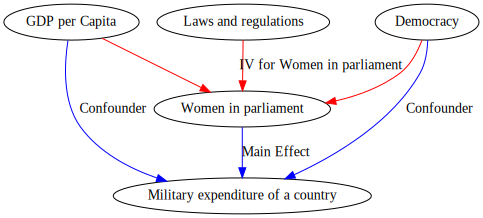

In [ ]:
# @title
g = gr.Digraph()

g.edge("GDP per Capita", "Military expenditure of a country", label="Confounder", color="blue")
g.edge("GDP per Capita", "Women in parliament", color="red")
g.edge("Democracy", "Military expenditure of a country", label="Confounder", color="blue")
g.edge("Democracy", "Women in parliament", color="red")
g.edge("Women in parliament", "Military expenditure of a country", label="Main Effect", color="blue")
g.edge("Laws and regulations", "Women in parliament", label="IV for Women in parliament", color="red")

g

*A positive association is marked with red and a negative one with blue.*

Without the controls, the model with all the countries states the *$\beta_1 $* to be 2.3 which goes against our initial assumption. This means that with 1% increase in women representation in the parliament, the military expenditure increases by 2.3 USD per capita.


However, by adding `democracy` and `gdp_capita` as controls, the model performance improves. The adjusted R-squared value increases from 0,08 to 0.516, meaning that 51.6% of the variation is explained by our model. Also, the *$\beta_1 $* is -4.2, which aligns with H1. All the variables in the model are statistically significant with p-value < 0.01, meaning that there is 99% chance that our results are not by chance.

By adding fixed effects,  *$\beta_1 $* comes positive again at 1.7 (p-value < 0.01). In order to investigate further, we look by income groups, to understand if there is any differences between them.

| Category | Without Fixed Effects | With Fixed Effects   |
|----------|-----------------------|----------------------|
| HIC      | 0.476                | 6.4062 ***          |
| UMC      | 1.378 ***            | -0.4394              |
| LMC      | -0.337 ***            | 0.2068 *            |
| LIC      | -0.211 ***            | -0.4171 ***          |


- "***" indicates three stars (high significance)
- "*" indicates one star (lower significance)

We can see that surprisingly the LIC comes negative both with and without the fixed effects, however the rest of the groups are either not significant or positive

Looking at the results we asked ourselves if we missed something, for this reason we looked at the potential impact of `stability` on the relation by performing a regression with the interaction term as it is written below.



*$Y_it = \beta_0 + \beta_1 \times Women_{Parl} + \beta_2 × GDP_{Cap} + \beta_3 × Democracy + \beta_4 × Stability + β5 × (Stability × Women_{parl}) + ɛ$*

We get high significant result with *$\beta_1=-4.5713$* and *$β_5 =-3.6478$*. This tells us that as stability increases, the effect of women in parliament on military expenditure becomes more negative. This is clearly consistent with our storyline as it supposes that when there is no direct need to invest in the military, the women spend less on it and possibly more on the social side.

For the IV both the first and the second stage proved to be statistically significant (p-value < 0.01), with the final result of -10.5 meaning that with 1% increase in women representation, we could expect military expenditure to drop by 10.5 USD per capita in the observed countries.

Knowing that the IV is used to counteract for three effects like the omitted variable bias, measurement errors and the reverse causality. We can infer that as our regressions performed before could be under the influence of these unwanted effects. So, we do not reject the H1. But IV is not a magical tool and therefore we need to discuss limitations of this method.

# Discussion


Looking at the results, we get contradicting evidence. Even though, we have positive correlation in the HIC, we still find the negative one with the IV on the whole sample and the LIC. That is further demonstrated through the interaction with stability. All these evidence show us that we are on the right track to causation. Indeed the IV is the most advanced tool we used in our analysis and it is constructed to shade out most of the heterogeneity and measurement errors. The fact that we have significant result in the direction we anticipated is therefore comforting. However, as mentioned before, we cannot prove causation and we are in fact far from being sure that it is the case.

We are looking at different countries in our analysis which is great in order to have various observations, but it makes it also **very difficult to see if we have smaller underlying trends**. We tried to counter that by looking at the income groups, but it did not give us very significant results.

Moreover, when we put the fixed effects, it almost always turned our relation positively. We are not sure why this happened, but by looking at smaller samples (be it reducing the number of countries or of years) could remove part of this problem.

One of the limitation of our study is that **we are looking at the percentage of women in parliament, but we have no way to know what power they have. This is central because in order for a change to happen, the women need to be able to vote freely and not to be told what to do**.

While we can theorize that the societal problems in LICs since 1997 were significantly larger compared to other income groups, which could be associated with the lower military spendings when women started joining the parliament. This association **could be attributed to women bringing their distinct perspectives on societal issues, shaped by their life experiences, to the decision-making process**. However, we still have to keep in mind that we have a **lower number of observations in this group, this could decrease the validity of our claim**.


Exploring this relation further, we propose to **look into more details for exogenous shocks** because within the time period we selected, we did not find any which would not be explained by other factors (Perlo-Freeman, 2016). Identifying such a shock would enable us to perform a Difference-in-Differences (DID) analysis, potentially bringing us closer to causation. We also believe that by further focusing on the countries within more resembling nature can lead to higher internal validity of the results. However, it will reduce the external validity as it would mean that our analysis would apply to countries similar to these.


 If our assumption regarding women lacking enough power to influence government spending is valid, then **women in key positions might demonstrate different results**. We can also assume that women in parliament with key positions may behave in a different way and  try to meet the expectations associated with roles traditionally occupied by men.

For the key message, we take our results with caution but now we also would like to ask ourselves, is everything what we believe about women is true? We are also influenced by some biases, as could be the statistical models.



---



# References

1. Alexander, D., & Andersen, K. (1993). Gender as a factor in the attribution of leadership traits. Political Research Quarterly, 46(3), 527-545.

2. Alves, M. F. (2022). Causal Inference for The Brave and True. Retrieved December 21, 2023, from https://matheusfacure.github.io/python-causality-handbook/landing-page.html

3. Bremer, Stuart A. (1992). Dangerous Dyads: Conditions Affecting the Likelihood of Interstate War, 1816–1965. Journal of Conflict Resolution, 36(2), 309–41.

4. Caprioli, M., & Boyer, M. A. (2001). Gender, Violence, and International Crisis. The Journal of Conflict Resolution, 45(4), 503–518. Retrieved from http://www.jstor.org/stable/3176309

5. Cullinan, R. (2018, July 24). In collaborative work cultures, women carry more of the weight. Harvard Business Review. Retrieved December 21, 2023, from https://hbr.org/2018/07/in-collaborative-work-cultures-women-carry-more-of-the-weight

6. Geys, B., & Sørensen, R. J. (2019). The impact of women above the political glass ceiling: Evidence from a Norwegian executive gender quota reform. Electoral Studies, 60, 102050. ISSN 0261-3794. Retrieved from https://doi.org/10.1016/j.electstud.2019.102050

7. Kenton, Will. (2023). Least Squares Method: What It Means, How to Use It, With Examples. Investopedia. Retrieved December 21, 2023, from https://www.investopedia.com/terms/l/least-squares-method.asp.

8. Koch, J. (2000). Do citizens apply gender stereotypes to infer candidates' ideological orientations? Journal of Politics, 62(2), 414-429.

9. Koch, M. T., & Fulton, S. A. (2011). In the defense of women: Gender, office holding, and national security policy in established democracies. The Journal of Politics, 73(1), 1-16. Retrieved from https://doi.org/10.1017/S0022381610000824

10. Marshall, Monty, and Keith Jaggers. (2002). Polity IV: Political Regime Characteristics and Transitions, 1800–2002. Retrieved December 21, 2023, from www.cidcm.umd.edu/inscr/polity/.

11. Perlo-Freeman, S., Fleurant, A., Wezeman, P. D., & Wezeman, S. T. (2016, April 25). Trends in World Military Expenditure, 2015. Stockholm International Peace Research Institute (SIPRI). Retrieved December 21, 2023, from https://css.ethz.ch/en/services/digital-library/articles/article.html/196612

12. Rasler, Karen A., and William R. Thompson. (1992). Political-Economic Tradeoffs and British Relative Decline. In Defense, Welfare, and Growth, eds. Steve Chan and Alex Mintz. London: Routledge, 36–60.

13. Reslen, E. (2018, July 18). Barack Obama Urges Women to Get More Involved in Politics—'Because Men Have Been Getting on My Nerves'. Harper's BAZAAR. Retrieved December 21, 2023, from https://www.yahoo.com/lifestyle/barack-obama-urges-women-more-184600650.html

14. Shapiro, R. Y., & Mahajan, H. (1986). Gender differences in policy preferences: A summary of trends from the 1960s to the 1980s. Public Opinion Quarterly, 50(2), 42-61.

15. Shair-Rosenfield, S., & Wood, R. M. (2017). Governing well after war: How improving female representation prolongs post-conflict peace. The Journal of Politics, 79(3), 995-1009. Retrieved from https://doi.org/10.1086/691056

16. Sigurdardottir, J. (2018, September 16). Give Women a Chance, and They Will Change the World. The New York Times. Retrieved December 21, 2023, from https://www.nytimes.com/2018/09/16/opinion/politics/johanna-sigurdardottir-give-women-a-chance.html

17. Sundheim, D. (2013, February 27). Do women take as many risks as men? Harvard Business Review. Retrieved December 21, 2023, from https://hbr.org/2013/02/do-women-take-as-many-risks-as

18. Williams, J. E., & Best, D. L. (1990). Measuring sex stereotypes: A multination study. Sage Publications.




Variables from World Bank:
- World Bank. (2023). Women Business and the Law Index Score (scale 1-100). Women, Business and the Law. Retrieved December 21, 2023, from https://wbl.worldbank.org/
- World Bank. (2023). Military Expenditure (current USD). Retrieved December 21, 2023, from https://data.worldbank.org/indicator/MS.MIL.XPND.CD
- World Bank. (2023). Population, total. Retrieved December 21, 2023, from https://data.worldbank.org/indicator/SP.POP.TOTL
- World Bank. (2023). Proportion of seats held by women in national parliaments (%). Retrieved December 21, 2023, from https://data.worldbank.org/indicator/SG.GEN.PARL.ZS
- World Bank. (2023). Political Stability and Absence of Violence/Terrorism: Estimate. Retrieved December 21, 2023, from https://databank.worldbank.org/metadataglossary/environment-social-and-governance-(esg)-data/series/PV.EST
- World Bank. (2023). GDP per capita (current US$). Retrieved December 21, 2023, from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD